In [1]:
! pip install dython
! pip install imbalanced-learn

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import StrMethodFormatter
from dython.nominal import associations
import seaborn as sns
import xgboost
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE


%matplotlib inline

In [4]:
df=pd.read_excel('~/Desktop/PROJECT/data_final3.xlsx')

In [5]:
df.columns

Index(['Do you feel good about yourself as a person?',
       'Do you feel worthwhile?',
       'Do you feel you have a number of good qualities as a person?',
       'Had any thoughts of harming yourself?',
       'Have you felt depressed DURING your pregnancy?',
       'How mild or severe would you consider your depression was during pregnancy',
       'Have you talked to your provider about depression during pregnancy?',
       'Have you felt anxious during your pregnancy?',
       'How long did you feel anxious?',
       'Have you ever been depressed BEFORE pregnancy?',
       'Have you been under a physician’s care for depression before being pregnant?',
       'Did the physician prescribe any medication for your depression before being pregnant?',
       'Was your pregnancy planned?',
       'Are you satisfied with your marriage/relationship?',
       'Are you currently experiencing any marital/ relationship problems?',
       'Do you feel you receive adequate emotional and instr

In [6]:
# Drop the specified columns
columns_to_drop = ['Score']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [7]:
# Shuffle data
df = shuffle(df, random_state=42)
df

,Do you feel good about yourself as a person?,Do you feel worthwhile?,Do you feel you have a number of good qualities as a person?,Had any thoughts of harming yourself?,Have you felt depressed DURING your pregnancy?,How mild or severe would you consider your depression was during pregnancy,Have you talked to your provider about depression during pregnancy?,Have you felt anxious during your pregnancy?,How long did you feel anxious?,Have you ever been depressed BEFORE pregnancy?,...,Do you feel you receive adequate emotional and instrumental (help with household chores and child care) support from your partner?,Do you feel you can rely on your partner when you need help?,"Do you feel you can confide in your partner, family and friends?",Is your infant experiencing any health problems?,Are you having problems with your baby feeding?,Are you having problems with your baby sleeping?,Would you consider your baby irritable or fussy?,"Since your new baby was born, how often have you felt down, depressed, or hopeless?","Since your new baby was born, how often have you had little interest or little pleasure in doing things?",depression
1556,Yes,Yes,No,Yes,No,Mild depression,Yes,Yes,Quite often,Yes,...,No,Yes,No,Yes,Yes,Yes,No,Most of the time,Most of the time,Moderate Depression
526,Yes,No,No,Yes,Yes,Significant signs of depression,No,No,Not very often,No,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Most of the time,Most of the time,Moderate Depression
393,No,Yes,No,Yes,No,Mild depression,Yes,Yes,Most of the time,No,...,No,Yes,Yes,No,No,No,No,Sometimes,Sometimes,Mild Depression
1789,Yes,Yes,Yes,Yes,Yes,Significant signs of depression,No,Yes,Quite often,Yes,...,No,Yes,No,No,No,No,No,Never,Never,Moderate Depression
433,No,No,No,No,Yes,Significant signs of depression,No,No,Not very often,Yes,...,Yes,Yes,Yes,Yes,No,No,Yes,Most of the time,Most of the time,Mild Depression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,No,Yes,No,No,No,Mild depression,Yes,No,Not very often,Yes,...,Yes,Yes,Yes,No,No,No,No,Sometimes,Sometimes,No Depression
1294,No,Yes,No,No,No,Mild depression,Yes,No,Not very often,Yes,...,No,No,Yes,Yes,No,Yes,Yes,Never,Never,Mild Depression
860,No,Yes,Yes,No,No,Mild depression,Yes,No,Not very often,No,...,No,No,Yes,Yes,Yes,No,Yes,Never,Never,Mild Depression
1459,No,Yes,No,Yes,No,Mild depression,Yes,Yes,Not very often,Yes,...,Yes,Yes,No,Yes,Yes,No,Yes,Most of the time,Most of the time,Moderate Depression


In [8]:
df.describe(include='all').T

,count,unique,top,freq
Do you feel good about yourself as a person?,2018,2,Yes,1081
Do you feel worthwhile?,2018,2,Yes,1104
Do you feel you have a number of good qualities as a person?,2018,2,Yes,1114
Had any thoughts of harming yourself?,2018,2,No,1125
Have you felt depressed DURING your pregnancy?,2018,2,No,1074
How mild or severe would you consider your depression was during pregnancy,2018,2,Mild depression,1357
Have you talked to your provider about depression during pregnancy?,2018,2,Yes,1082
Have you felt anxious during your pregnancy?,2018,2,No,1166
How long did you feel anxious?,2018,3,Not very often,1288
Have you ever been depressed BEFORE pregnancy?,2018,2,Yes,1071


In [12]:
df.dtypes

Do you feel good about yourself as a person?                                                                                          object
Do you feel worthwhile?                                                                                                               object
Do you feel you have a number of good qualities as a person?                                                                          object
Had any thoughts of harming yourself?                                                                                                 object
Have you felt depressed DURING your pregnancy?                                                                                        object
How mild or severe would you consider your depression was during pregnancy                                                            object
Have you talked to your provider about depression during pregnancy?                                                                   object
Have you felt

In [13]:
# Get *absolute* counts of unique values for features based on dtypes
col_name = df.select_dtypes(include='object').columns

for index, col in enumerate(col_name):
    print(f'\033[1;3m{col_name[index]}:\033[0m\n{df[col].value_counts()}\n')

Do you feel good about yourself as a person?:
Yes    1081
No      937
Name: Do you feel good about yourself as a person?, dtype: int64

Do you feel worthwhile?:
Yes    1104
No      914
Name: Do you feel worthwhile?, dtype: int64

Do you feel you have a number of good qualities as a person?:
Yes    1114
No      904
Name: Do you feel you have a number of good qualities as a person?, dtype: int64

Had any thoughts of harming yourself?:
No     1125
Yes     893
Name: Had any thoughts of harming yourself?, dtype: int64

Have you felt depressed DURING your pregnancy?:
No     1074
Yes     944
Name: Have you felt depressed DURING your pregnancy?, dtype: int64

How mild or severe would you consider your depression was during pregnancy:
Mild depression                    1357
Significant signs of depression     661
Name: How mild or severe would you consider your depression was during pregnancy, dtype: int64

Have you talked to your provider about depression during pregnancy?:
Yes    1082
No     

In [14]:
# Get *relative* counts of unique values for features based on dtypes
col_name = df.select_dtypes(include="object").columns

for index, col in enumerate(col_name):
    print(f'\033[1;3m{col_name[index]} (%):\033[0m\n{np.round(df[col].value_counts(normalize=True)*100, 1)}\n')

Do you feel good about yourself as a person? (%):
Yes    53.6
No     46.4
Name: Do you feel good about yourself as a person?, dtype: float64

Do you feel worthwhile? (%):
Yes    54.7
No     45.3
Name: Do you feel worthwhile?, dtype: float64

Do you feel you have a number of good qualities as a person? (%):
Yes    55.2
No     44.8
Name: Do you feel you have a number of good qualities as a person?, dtype: float64

Had any thoughts of harming yourself? (%):
No     55.7
Yes    44.3
Name: Had any thoughts of harming yourself?, dtype: float64

Have you felt depressed DURING your pregnancy? (%):
No     53.2
Yes    46.8
Name: Have you felt depressed DURING your pregnancy?, dtype: float64

How mild or severe would you consider your depression was during pregnancy (%):
Mild depression                    67.2
Significant signs of depression    32.8
Name: How mild or severe would you consider your depression was during pregnancy, dtype: float64

Have you talked to your provider about depression du

In [15]:
# Get list of available styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [16]:
plt.style.use('seaborn-v0_8-dark-palette')

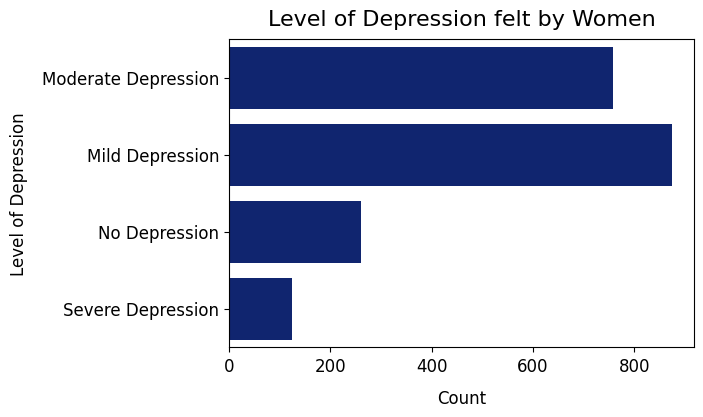

In [18]:
# Count plot of target variable 'Depression'
plt.figure(figsize=(6,4))
sns.countplot(y='depression', data=df)
plt.xlabel(xlabel='Count', fontsize=12, labelpad=10)
plt.ylabel(ylabel='Level of Depression', fontsize=12, labelpad=10)
plt.title(label='Level of Depression felt by Women', fontsize=16, pad=10)
plt.tick_params(axis='both', labelsize=12);

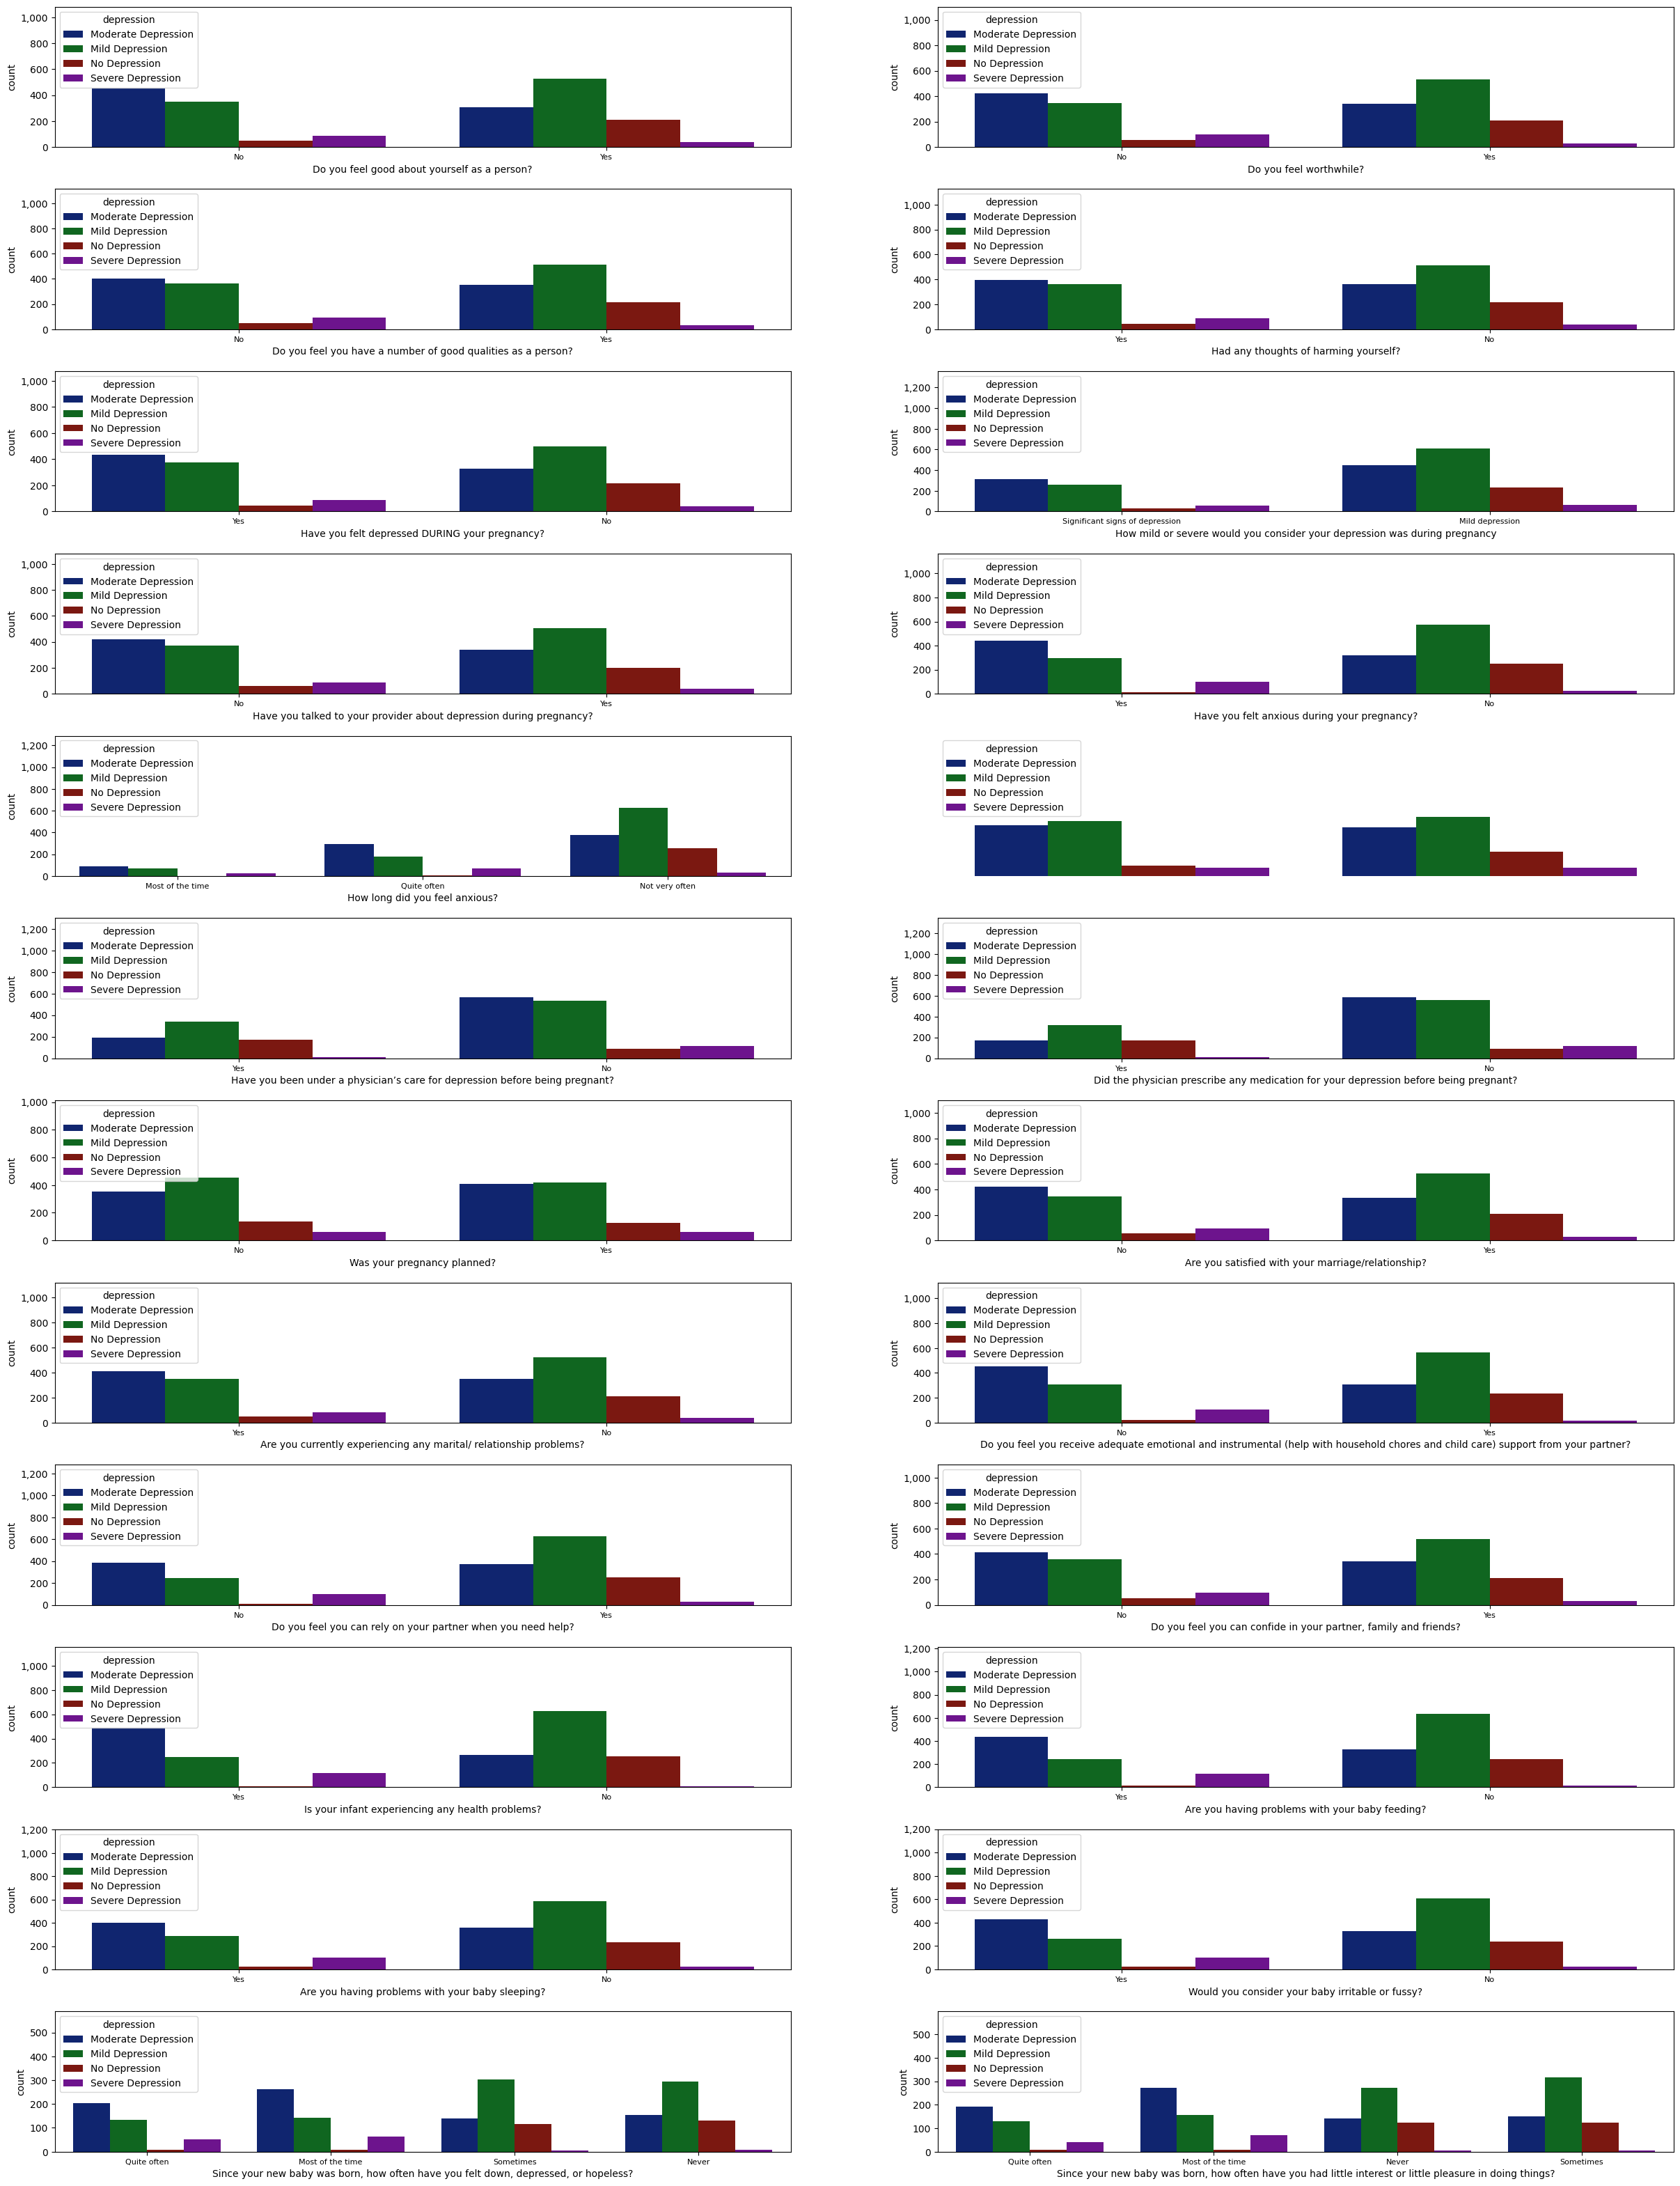

In [24]:
# Count plots of feature variables 

# Features to plot
columns = [c for c in df.columns if c != 'depression']
    
# Creating subplot axes
fig, axes = plt.subplots(12, 2, figsize=(30,40), sharey=False)
axes[4,1].set_axis_off()

# Iterating through axes and columns
for name, ax in zip(columns, axes.flatten()):
    sns.countplot(x=name, hue='depression', data=df, order=df[name].value_counts(ascending=True).index, ax=ax)
    ax.tick_params(axis='x', labelsize=8)
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    ax.set_ylim([0, max(df[name].value_counts())])
    ax.legend(title='depression', loc='upper left')
    plt.subplots_adjust(hspace=0.3);

In [29]:
# Create map for depression level
depression_level = {'No Depression': 0,
             'Mild Depression': 1,
             'Moderate Depression': 2,
             'Severe Depression': 3}

In [30]:
# Map depression level
df['depression'] = df['depression'].map(depression_level)
df.head(10)

,Do you feel good about yourself as a person?,Do you feel worthwhile?,Do you feel you have a number of good qualities as a person?,Had any thoughts of harming yourself?,Have you felt depressed DURING your pregnancy?,How mild or severe would you consider your depression was during pregnancy,Have you talked to your provider about depression during pregnancy?,Have you felt anxious during your pregnancy?,How long did you feel anxious?,Have you ever been depressed BEFORE pregnancy?,...,Do you feel you receive adequate emotional and instrumental (help with household chores and child care) support from your partner?,Do you feel you can rely on your partner when you need help?,"Do you feel you can confide in your partner, family and friends?",Is your infant experiencing any health problems?,Are you having problems with your baby feeding?,Are you having problems with your baby sleeping?,Would you consider your baby irritable or fussy?,"Since your new baby was born, how often have you felt down, depressed, or hopeless?","Since your new baby was born, how often have you had little interest or little pleasure in doing things?",depression
1556,Yes,Yes,No,Yes,No,Mild depression,Yes,Yes,Quite often,Yes,...,No,Yes,No,Yes,Yes,Yes,No,Most of the time,Most of the time,2
526,Yes,No,No,Yes,Yes,Significant signs of depression,No,No,Not very often,No,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Most of the time,Most of the time,2
393,No,Yes,No,Yes,No,Mild depression,Yes,Yes,Most of the time,No,...,No,Yes,Yes,No,No,No,No,Sometimes,Sometimes,1
1789,Yes,Yes,Yes,Yes,Yes,Significant signs of depression,No,Yes,Quite often,Yes,...,No,Yes,No,No,No,No,No,Never,Never,2
433,No,No,No,No,Yes,Significant signs of depression,No,No,Not very often,Yes,...,Yes,Yes,Yes,Yes,No,No,Yes,Most of the time,Most of the time,1
1159,No,Yes,Yes,No,Yes,Significant signs of depression,Yes,Yes,Quite often,Yes,...,No,No,No,Yes,Yes,No,Yes,Most of the time,Most of the time,2
1090,No,Yes,Yes,No,No,Mild depression,Yes,No,Not very often,No,...,Yes,Yes,Yes,No,No,No,Yes,Never,Never,0
429,Yes,No,Yes,No,Yes,Significant signs of depression,No,No,Not very often,Yes,...,Yes,Yes,Yes,Yes,No,Yes,Yes,Sometimes,Sometimes,2
1802,No,Yes,Yes,No,Yes,Significant signs of depression,Yes,Yes,Quite often,Yes,...,No,No,Yes,No,No,No,No,Never,Never,1
530,Yes,Yes,No,No,Yes,Mild depression,Yes,No,Not very often,Yes,...,No,No,No,Yes,Yes,Yes,No,Most of the time,Most of the time,2


In [31]:
df.columns

Index(['Do you feel good about yourself as a person?',
       'Do you feel worthwhile?',
       'Do you feel you have a number of good qualities as a person?',
       'Had any thoughts of harming yourself?',
       'Have you felt depressed DURING your pregnancy?',
       'How mild or severe would you consider your depression was during pregnancy',
       'Have you talked to your provider about depression during pregnancy?',
       'Have you felt anxious during your pregnancy?',
       'How long did you feel anxious?',
       'Have you ever been depressed BEFORE pregnancy?',
       'Have you been under a physician’s care for depression before being pregnant?',
       'Did the physician prescribe any medication for your depression before being pregnant?',
       'Was your pregnancy planned?',
       'Are you satisfied with your marriage/relationship?',
       'Are you currently experiencing any marital/ relationship problems?',
       'Do you feel you receive adequate emotional and instr

In [32]:
# Label encoding
le = LabelEncoder()
selected_columns = [
        'Do you feel good about yourself as a person?',
       'Do you feel worthwhile?',
       'Do you feel you have a number of good qualities as a person?',
       'Had any thoughts of harming yourself?',
       'Have you felt depressed DURING your pregnancy?',
       'Have you talked to your provider about depression during pregnancy?',
       'Have you felt anxious during your pregnancy?',
       'Have you ever been depressed BEFORE pregnancy?',
       'Have you been under a physician’s care for depression before being pregnant?',
       'Did the physician prescribe any medication for your depression before being pregnant?',
       'Was your pregnancy planned?',
       'Are you satisfied with your marriage/relationship?',
       'Are you currently experiencing any marital/ relationship problems?',
       'Do you feel you receive adequate emotional and instrumental (help with household chores and child care) support from your partner?',
       'Do you feel you can rely on your partner when you need help?',
       'Do you feel you can confide in your partner, family and friends?',
       'Is your infant experiencing any health problems?',
       'Are you having problems with your baby feeding?',
       'Are you having problems with your baby sleeping?',
       'Would you consider your baby irritable or fussy?'
            ]
# Apply label encoding to selected columns for training set
for col in selected_columns:
    df[col] = le.fit_transform(df[col])
df.head()

,Do you feel good about yourself as a person?,Do you feel worthwhile?,Do you feel you have a number of good qualities as a person?,Had any thoughts of harming yourself?,Have you felt depressed DURING your pregnancy?,How mild or severe would you consider your depression was during pregnancy,Have you talked to your provider about depression during pregnancy?,Have you felt anxious during your pregnancy?,How long did you feel anxious?,Have you ever been depressed BEFORE pregnancy?,...,Do you feel you receive adequate emotional and instrumental (help with household chores and child care) support from your partner?,Do you feel you can rely on your partner when you need help?,"Do you feel you can confide in your partner, family and friends?",Is your infant experiencing any health problems?,Are you having problems with your baby feeding?,Are you having problems with your baby sleeping?,Would you consider your baby irritable or fussy?,"Since your new baby was born, how often have you felt down, depressed, or hopeless?","Since your new baby was born, how often have you had little interest or little pleasure in doing things?",depression
1556,1,1,0,1,0,Mild depression,1,1,Quite often,1,...,0,1,0,1,1,1,0,Most of the time,Most of the time,2
526,1,0,0,1,1,Significant signs of depression,0,0,Not very often,0,...,1,1,1,1,1,0,1,Most of the time,Most of the time,2
393,0,1,0,1,0,Mild depression,1,1,Most of the time,0,...,0,1,1,0,0,0,0,Sometimes,Sometimes,1
1789,1,1,1,1,1,Significant signs of depression,0,1,Quite often,1,...,0,1,0,0,0,0,0,Never,Never,2
433,0,0,0,0,1,Significant signs of depression,0,0,Not very often,1,...,1,1,1,1,0,0,1,Most of the time,Most of the time,1


In [33]:
Map={'Mild depression':0,'Significant signs of depression':1}
df['How mild or severe would you consider your depression was during pregnancy'] = df['How mild or severe would you consider your depression was during pregnancy'].map(Map)

In [34]:
df.head()

,Do you feel good about yourself as a person?,Do you feel worthwhile?,Do you feel you have a number of good qualities as a person?,Had any thoughts of harming yourself?,Have you felt depressed DURING your pregnancy?,How mild or severe would you consider your depression was during pregnancy,Have you talked to your provider about depression during pregnancy?,Have you felt anxious during your pregnancy?,How long did you feel anxious?,Have you ever been depressed BEFORE pregnancy?,...,Do you feel you receive adequate emotional and instrumental (help with household chores and child care) support from your partner?,Do you feel you can rely on your partner when you need help?,"Do you feel you can confide in your partner, family and friends?",Is your infant experiencing any health problems?,Are you having problems with your baby feeding?,Are you having problems with your baby sleeping?,Would you consider your baby irritable or fussy?,"Since your new baby was born, how often have you felt down, depressed, or hopeless?","Since your new baby was born, how often have you had little interest or little pleasure in doing things?",depression
1556,1,1,0,1,0,0,1,1,Quite often,1,...,0,1,0,1,1,1,0,Most of the time,Most of the time,2
526,1,0,0,1,1,1,0,0,Not very often,0,...,1,1,1,1,1,0,1,Most of the time,Most of the time,2
393,0,1,0,1,0,0,1,1,Most of the time,0,...,0,1,1,0,0,0,0,Sometimes,Sometimes,1
1789,1,1,1,1,1,1,0,1,Quite often,1,...,0,1,0,0,0,0,0,Never,Never,2
433,0,0,0,0,1,1,0,0,Not very often,1,...,1,1,1,1,0,0,1,Most of the time,Most of the time,1


In [35]:
Anxious_Ordinal_mapping = {
    'Not very often': 0,
    'Quite often': 1,
    'Most of the time': 2
}
df['How long did you feel anxious?'] = df['How long did you feel anxious?'].map(Anxious_Ordinal_mapping)

In [36]:
ordinal_mapping = {
    'Never': 0,
    'Sometimes': 1,
    'Quite often': 2,
    'Most of the time': 3
}

df['Since your new baby was born, how often have you felt down, depressed, or hopeless?'] = df['Since your new baby was born, how often have you felt down, depressed, or hopeless?'].map(ordinal_mapping)
df['Since your new baby was born, how often have you had little interest or little pleasure in doing things?'] = df['Since your new baby was born, how often have you had little interest or little pleasure in doing things?'].map(ordinal_mapping)

In [37]:
target='depression'
X = df.drop(columns=target, axis=1).copy()
y = df['depression']
X.head(10)

,Do you feel good about yourself as a person?,Do you feel worthwhile?,Do you feel you have a number of good qualities as a person?,Had any thoughts of harming yourself?,Have you felt depressed DURING your pregnancy?,How mild or severe would you consider your depression was during pregnancy,Have you talked to your provider about depression during pregnancy?,Have you felt anxious during your pregnancy?,How long did you feel anxious?,Have you ever been depressed BEFORE pregnancy?,...,Are you currently experiencing any marital/ relationship problems?,Do you feel you receive adequate emotional and instrumental (help with household chores and child care) support from your partner?,Do you feel you can rely on your partner when you need help?,"Do you feel you can confide in your partner, family and friends?",Is your infant experiencing any health problems?,Are you having problems with your baby feeding?,Are you having problems with your baby sleeping?,Would you consider your baby irritable or fussy?,"Since your new baby was born, how often have you felt down, depressed, or hopeless?","Since your new baby was born, how often have you had little interest or little pleasure in doing things?"
1556,1,1,0,1,0,0,1,1,1,1,...,1,0,1,0,1,1,1,0,3,3
526,1,0,0,1,1,1,0,0,0,0,...,0,1,1,1,1,1,0,1,3,3
393,0,1,0,1,0,0,1,1,2,0,...,0,0,1,1,0,0,0,0,1,1
1789,1,1,1,1,1,1,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
433,0,0,0,0,1,1,0,0,0,1,...,0,1,1,1,1,0,0,1,3,3
1159,0,1,1,0,1,1,1,1,1,1,...,1,0,0,0,1,1,0,1,3,3
1090,0,1,1,0,0,0,1,0,0,0,...,0,1,1,1,0,0,0,1,0,0
429,1,0,1,0,1,1,0,0,0,1,...,1,1,1,1,1,0,1,1,1,1
1802,0,1,1,0,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
530,1,1,0,0,1,0,1,0,0,1,...,1,0,0,0,1,1,1,0,3,3


In [38]:
# Check for missing values
y.isna().sum()

0

In [39]:
# Define the classifier
dtc = DecisionTreeClassifier()

# Define Stratified K-Fold Cross-Validation
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

dtc_best_model = None
best_f1_score = 0.0

# Lists to store evaluation metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through each fold of the cross-validation
for fold_idx, (train_idx, test_idx) in enumerate(k_fold.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Apply SMOTE to balance the classes in the training set
    smt = SMOTE()
    X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
    
    # Train the Decision Tree Classifier
    dtc.fit(X_train_sm, y_train_sm)
    
    # Make predictions on the test set
    y_pred = dtc.predict(X_test)
    
    # Calculate evaluation metrics for the current fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Append scores to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

     # Check if current model is the best model based on F1-score
    if f1 > best_f1_score:
        best_f1_score = f1
        dtc_best_model = dtc  # Update best model
     # Print classification report for the current fold
    print(f"Classification Report - Fold {fold_idx}:")
    print("Accuracy on train set",dtc.score(X_train_sm, y_train_sm))
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print('\n')
    print("="*60)

# Compute mean scores across all folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)

# Display mean evaluation metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Best F1 score", best_f1_score)

Classification Report - Fold 1:
Accuracy on train set 1.0
Accuracy: 0.6905940594059405
Precision: 0.6408258279465711
Recall: 0.6410143146327357
F1 Score: 0.6399316710834693


Classification Report - Fold 2:
Accuracy on train set 1.0
Accuracy: 0.6707920792079208
Precision: 0.648176510989011
Recall: 0.6673872180451128
F1 Score: 0.6553596925432033


Classification Report - Fold 3:
Accuracy on train set 1.0
Accuracy: 0.7004950495049505
Precision: 0.6633291142127349
Recall: 0.6828473815475579
F1 Score: 0.6723763519966959


Classification Report - Fold 4:
Accuracy on train set 1.0
Accuracy: 0.6823821339950372
Precision: 0.6611704249185443
Recall: 0.6813394221672368
F1 Score: 0.6706055435887768


Classification Report - Fold 5:
Accuracy on train set 1.0
Accuracy: 0.684863523573201
Precision: 0.6717268144154935
Recall: 0.7188434247871334
F1 Score: 0.689956053336335


Mean Accuracy: 0.6858253691374101
Mean Precision: 0.657045738496471
Mean Recall: 0.6782863522359552
Mean F1 Score: 0.66564586250

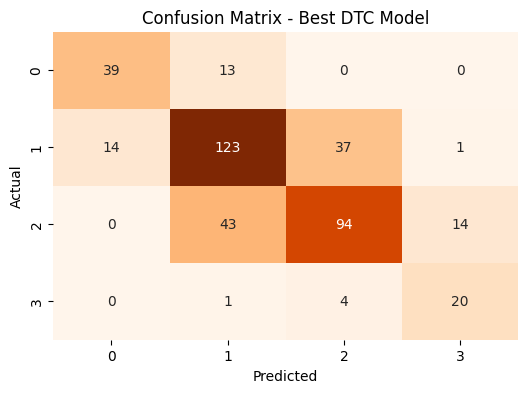

Classification Report - Best DTC Model:
              precision    recall  f1-score   support

           0       0.74      0.75      0.74        52
           1       0.68      0.70      0.69       175
           2       0.70      0.62      0.66       151
           3       0.57      0.80      0.67        25

    accuracy                           0.68       403
   macro avg       0.67      0.72      0.69       403
weighted avg       0.69      0.68      0.68       403



In [40]:
# Make predictions on the entire dataset using the best model
y_pred_best = dtc_best_model.predict(X_test)
    
# Calculate confusion matrix
cm_best_model = confusion_matrix(y_test, y_pred_best)
    
 # Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best_model, annot=True, fmt='d', cmap='Oranges', cbar=False) 
plt.title('Confusion Matrix - Best DTC Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report of the best model
print("Classification Report - Best DTC Model:")
print(classification_report(y_test, y_pred_best))

In [41]:
# Define the classifier
rfc = RandomForestClassifier()

# Define Stratified K-Fold Cross-Validation
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rfc_best_model = None
best_f1_score = 0.0

# Lists to store evaluation metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through each fold of the cross-validation
for fold_idx, (train_idx, test_idx) in enumerate(k_fold.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Apply SMOTE to balance the classes in the training set
    smt = SMOTE()
    X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
    
    # Train the Decision Tree Classifier
    rfc.fit(X_train_sm, y_train_sm)
    
    # Make predictions on the test set
    y_pred = rfc.predict(X_test)
    
    # Calculate evaluation metrics for the current fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Append scores to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

     # Check if current model is the best model based on F1-score
    if f1 > best_f1_score:
        best_f1_score = f1
        rfc_best_model = rfc  # Update best model
     # Print classification report for the current fold
    print(f"Classification Report - Fold {fold_idx}:")
    print("Accuracy on train set",rfc.score(X_train_sm, y_train_sm))
    print("Accuracy:",accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print('\n')
    print("="*60)

# Compute mean scores across all folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)

# Display mean evaluation metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Best F1 score", best_f1_score)

Classification Report - Fold 1:
Accuracy on train set 1.0
Accuracy: 0.8094059405940595
Precision: 0.8032095119461481
Recall: 0.7546746674378253
F1 Score: 0.7647189637280445


Classification Report - Fold 2:
Accuracy on train set 1.0
Accuracy: 0.8193069306930693
Precision: 0.8128342922842484
Recall: 0.7999508386350492
F1 Score: 0.8060234318852891


Classification Report - Fold 3:
Accuracy on train set 1.0
Accuracy: 0.7970297029702971
Precision: 0.7932943772474664
Recall: 0.7653488511454303
F1 Score: 0.7759169602080914


Classification Report - Fold 4:
Accuracy on train set 1.0
Accuracy: 0.8337468982630273
Precision: 0.8146190351793801
Recall: 0.8293768648569972
F1 Score: 0.8212422354795237


Classification Report - Fold 5:
Accuracy on train set 1.0
Accuracy: 0.8163771712158809
Precision: 0.81369652508183
Recall: 0.8126186230987555
F1 Score: 0.8129995171026116


Mean Accuracy: 0.8151733287472668
Mean Precision: 0.8075307483478145
Mean Recall: 0.7923939690348115
Mean F1 Score: 0.796180221

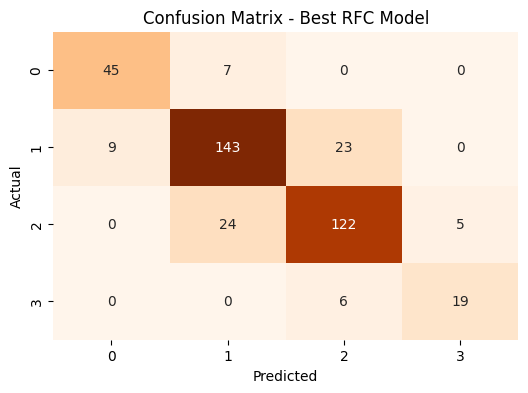

Classification Report - Best RFC Model:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        52
           1       0.82      0.82      0.82       175
           2       0.81      0.81      0.81       151
           3       0.79      0.76      0.78        25

    accuracy                           0.82       403
   macro avg       0.81      0.81      0.81       403
weighted avg       0.82      0.82      0.82       403



In [42]:
# Make predictions on the entire dataset using the best model
y_pred_best = rfc_best_model.predict(X_test)
    
# Calculate confusion matrix
cm_best_model = confusion_matrix(y_test, y_pred_best)
    
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best_model, annot=True, fmt='d', cmap='Oranges', cbar=False) 
plt.title('Confusion Matrix - Best RFC Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report of the best model
print("Classification Report - Best RFC Model:")
print(classification_report(y_test, y_pred_best))

In [43]:
# Define the classifier
svc = SVC()

# Define Stratified K-Fold Cross-Validation
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

svc_best_model = None
best_f1_score = 0.0

# Lists to store evaluation metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through each fold of the cross-validation
for fold_idx, (train_idx, test_idx) in enumerate(k_fold.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Apply SMOTE to balance the classes in the training set
    smt = SMOTE()
    X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
    
    # Train the Decision Tree Classifier
    svc.fit(X_train_sm, y_train_sm)
    
    # Make predictions on the test set
    y_pred = svc.predict(X_test)
    
    # Calculate evaluation metrics for the current fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Append scores to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

     # Check if current model is the best model based on F1-score
    if f1 > best_f1_score:
        best_f1_score = f1
        svc_best_model = svc  # Update best model
     # Print classification report for the current fold
    print(f"Classification Report - Fold {fold_idx}:")
    print("Accuracy on train set",svc.score(X_train_sm, y_train_sm))
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print('\n')
    print("="*60)

# Compute mean scores across all folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)

# Display mean evaluation metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Best F1 score", best_f1_score)

Classification Report - Fold 1:
Accuracy on train set 0.9831902718168812
Accuracy: 0.8985148514851485
Precision: 0.864790398918188
Recall: 0.9113909774436091
F1 Score: 0.885605014952841


Classification Report - Fold 2:
Accuracy on train set 0.9821173104434907
Accuracy: 0.9232673267326733
Precision: 0.8951546339139902
Recall: 0.9493088490456911
F1 Score: 0.9185489641663112


Classification Report - Fold 3:
Accuracy on train set 0.9814285714285714
Accuracy: 0.9405940594059405
Precision: 0.9091149884146044
Recall: 0.9597415790615119
F1 Score: 0.9313958555881453


Classification Report - Fold 4:
Accuracy on train set 0.9824749642346209
Accuracy: 0.9255583126550868
Precision: 0.8911806655104966
Recall: 0.944484389782403
F1 Score: 0.9142454097626511


Classification Report - Fold 5:
Accuracy on train set 0.9821173104434907
Accuracy: 0.9081885856079405
Precision: 0.8788109648022029
Recall: 0.9392225820537079
F1 Score: 0.9042844687871039


Mean Accuracy: 0.9192246271773579
Mean Precision: 0.8

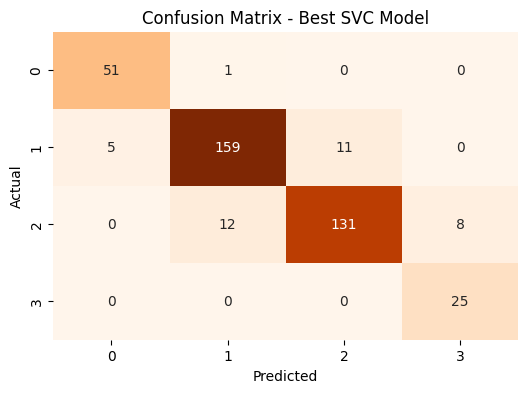

Classification Report - Best SVC Model:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        52
           1       0.92      0.91      0.92       175
           2       0.92      0.87      0.89       151
           3       0.76      1.00      0.86        25

    accuracy                           0.91       403
   macro avg       0.88      0.94      0.90       403
weighted avg       0.91      0.91      0.91       403



In [44]:
# Make predictions on the entire dataset using the best model
y_pred_best = svc_best_model.predict(X_test)
    
# Calculate confusion matrix
cm_best_model = confusion_matrix(y_test, y_pred_best)
    
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best_model, annot=True, fmt='d', cmap='Oranges', cbar=False) 
plt.title('Confusion Matrix - Best SVC Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report of the best model
print("Classification Report - Best SVC Model:")
print(classification_report(y_test, y_pred_best))

In [45]:
# Define the classifier

xgb = XGBClassifier()

# Define Stratified K-Fold Cross-Validation
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

xgb_best_model = None
best_f1_score = 0.0

# Lists to store evaluation metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through each fold of the cross-validation
for fold_idx, (train_idx, test_idx) in enumerate(k_fold.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Apply SMOTE to balance the classes in the training set
    smt = SMOTE()
    X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
    
    # Train the Decision Tree Classifier
    xgb.fit(X_train_sm, y_train_sm)
    
    # Make predictions on the test set
    y_pred = xgb.predict(X_test)
    
    # Calculate evaluation metrics for the current fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Append scores to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

     # Check if current model is the best model based on F1-score
    if f1 > best_f1_score:
        best_f1_score = f1
        xgb_best_model = xgb  # Update best model
     # Print classification report for the current fold
    print(f"Classification Report - Fold {fold_idx}:")
    
    print("Accuracy on train set",xgb.score(X_train_sm, y_train_sm))
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print('\n')
    print("="*60)

# Compute mean scores across all folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)

# Display mean evaluation metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Best F1 score", best_f1_score)

Classification Report - Fold 1:
Accuracy on train set 1.0
Accuracy: 0.8341584158415841
Precision: 0.8359384808537351
Recall: 0.8068413823019087
F1 Score: 0.8153519602623004


Classification Report - Fold 2:
Accuracy on train set 1.0
Accuracy: 0.8465346534653465
Precision: 0.8467735310498468
Recall: 0.8521652689415846
F1 Score: 0.8490921166037265


Classification Report - Fold 3:
Accuracy on train set 1.0
Accuracy: 0.844059405940594
Precision: 0.8368347338935573
Recall: 0.8086031400883471
F1 Score: 0.8191843632435017


Classification Report - Fold 4:
Accuracy on train set 1.0
Accuracy: 0.8436724565756824
Precision: 0.8054030405446039
Recall: 0.839582090095335
F1 Score: 0.8205524701693727


Classification Report - Fold 5:
Accuracy on train set 1.0
Accuracy: 0.8535980148883374
Precision: 0.851848179377267
Recall: 0.8502616257914271
F1 Score: 0.8507264827256367


Mean Accuracy: 0.8444045893423089
Mean Precision: 0.835359593143802
Mean Recall: 0.8314907014437205
Mean F1 Score: 0.83098147860

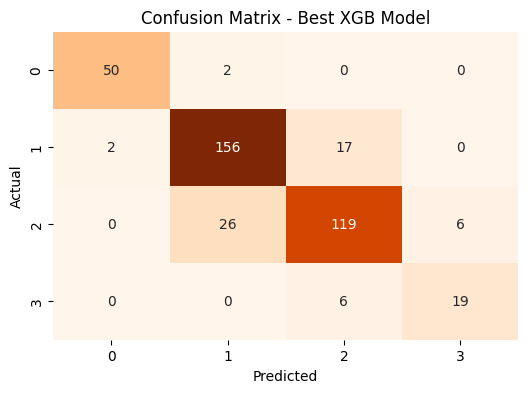

Classification Report - Best XGB Model:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        52
           1       0.85      0.89      0.87       175
           2       0.84      0.79      0.81       151
           3       0.76      0.76      0.76        25

    accuracy                           0.85       403
   macro avg       0.85      0.85      0.85       403
weighted avg       0.85      0.85      0.85       403



In [46]:
# Make predictions on the entire dataset using the best model
y_pred_best = xgb_best_model.predict(X_test)
    
# Calculate confusion matrix
cm_best_model = confusion_matrix(y_test, y_pred_best)
    
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best_model, annot=True, fmt='d', cmap='Oranges', cbar=False) 
plt.title('Confusion Matrix - Best XGB Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report of the best model
print("Classification Report - Best XGB Model:")
print(classification_report(y_test, y_pred_best))

In [47]:
# Define the classifier
knn_classifier = KNeighborsClassifier()

# Define Stratified K-Fold Cross-Validation
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

knn_best_model = None
best_f1_score = 0.0

# Lists to store evaluation metrics across folds
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through each fold of the cross-validation
for fold_idx, (train_idx, test_idx) in enumerate(k_fold.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Apply SMOTE to balance the classes in the training set
    smt = SMOTE()
    X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
    
    # Train the Decision Tree Classifier
    knn_classifier.fit(X_train_sm, y_train_sm)
    
    # Make predictions on the test set
    y_pred = knn_classifier.predict(X_test)
    
    # Calculate evaluation metrics for the current fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Append scores to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

     # Check if current model is the best model based on F1-score
    if f1 > best_f1_score:
        best_f1_score = f1
        knn_best_model = knn_classifier  # Update best model
     # Print classification report for the current fold
    print(f"Classification Report - Fold {fold_idx}:")
    
    print("Accuracy on train set",knn_classifier.score(X_train_sm, y_train_sm))
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print('\n')
    print("="*60)

# Compute mean scores across all folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)

# Display mean evaluation metrics
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)
print("Best F1 score", best_f1_score)

Classification Report - Fold 1:
Accuracy on train set 0.8876967095851216
Accuracy: 0.6683168316831684
Precision: 0.63492378370895
Recall: 0.7876785714285715
F1 Score: 0.6605924405321648


Classification Report - Fold 2:
Accuracy on train set 0.8762517882689557
Accuracy: 0.650990099009901
Precision: 0.617457072084539
Recall: 0.7834398496240602
F1 Score: 0.6475770384255805


Classification Report - Fold 3:
Accuracy on train set 0.8846428571428572
Accuracy: 0.6831683168316832
Precision: 0.6377850139083123
Recall: 0.7660815669622983
F1 Score: 0.6686589859767829


Classification Report - Fold 4:
Accuracy on train set 0.8762517882689557
Accuracy: 0.6724565756823822
Precision: 0.6444969347394043
Recall: 0.7957615894039736
F1 Score: 0.662728594656207


Classification Report - Fold 5:
Accuracy on train set 0.8830472103004292
Accuracy: 0.6575682382133995
Precision: 0.6139363048321632
Recall: 0.7583238119496397
F1 Score: 0.64208541886196


Mean Accuracy: 0.6665000122841069
Mean Precision: 0.62971

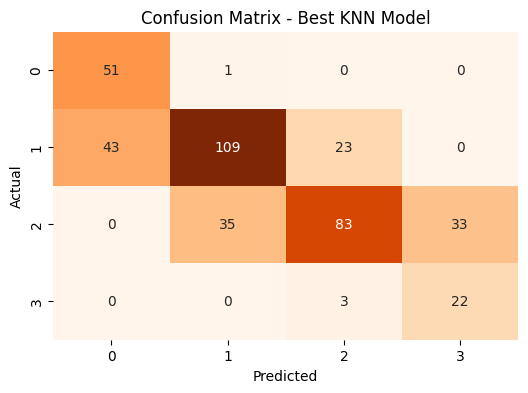

Classification Report - Best KNN Model:
              precision    recall  f1-score   support

           0       0.54      0.98      0.70        52
           1       0.75      0.62      0.68       175
           2       0.76      0.55      0.64       151
           3       0.40      0.88      0.55        25

    accuracy                           0.66       403
   macro avg       0.61      0.76      0.64       403
weighted avg       0.71      0.66      0.66       403



In [48]:
# Make predictions on the entire dataset using the best model
y_pred_best = knn_best_model.predict(X_test)
    
# Calculate confusion matrix
cm_best_model = confusion_matrix(y_test, y_pred_best)
    
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best_model, annot=True, fmt='d', cmap='Oranges', cbar=False) 
plt.title('Confusion Matrix - Best KNN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report of the best model
print("Classification Report - Best KNN Model:")
print(classification_report(y_test, y_pred_best))

In [49]:
import pickle
#Define the filename for saving the model
filename = 'svc_model.pkl'

# Use pickle to save the trained model to a file
with open(filename, 'wb') as file:
   pickle.dump(svc_best_model, file)